# **KELOMPOK GIGIH**
# **Nama Anggota Kelompok :**

*   Atthantowi Surya Faqih
*   Syifa Auliyah Hasanah



In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from pprint import pprint as pp
from scipy import stats
from scipy.interpolate import make_interp_spline
from scipy.stats import kde
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')


### **Data Understanding**

In [ ]:
df1

,NIM;ANGKATAN;SEMESTER;KODE_MK;NAMA_MK;SKS;NILAI;GRADE
0,10110310002;2010;1011;EM100;EM100 Dasar-dasar ...
1,10110310002;2010;1011;EM180;EM180 Matematika B...
2,10110310002;2010;1011;TI100;TI100 Algoritma da...
3,10110310002;2010;1011;TI101;TI101 Matematika D...
4,10110310002;2010;1011;TI110;TI110 Pengantar Te...
...,...
30865,00000033849;2018;1821;IS220;Interaksi Manusia ...
30866,00000033849;2018;1821;IS240;Probabilitas dan S...
30867,00000033849;2018;1821;IS251;Perilaku Organisas...
30868,00000033849;2018;1821;IS255;Algoritma dan Stru...


In [ ]:
df1=pd.read_csv('Dataset1_TranscriptMahasiswa.csv', sep=';')
df2=pd.read_csv('Dataset2_EvaluasiDosenPerMK.csv', sep=';')

print('Dataset 1 :\n')
df1.info()
print('=======================================\n')
print('Missing Values pada Dataset 1:')
print(df1.isnull().sum())
print('=======================================\n')
print('Dataset 2:\n')
df2.info()
print('=======================================\n')
print('Missing Values pada Dataset 2:')
print(df2.isnull().sum())

Dataset 1 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30871 non-null  object
dtypes: object(1)
memory usage: 241.3+ KB

Missing Values pada Dataset 1:
0    0
dtype: int64

Dataset 2:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   TAHUN;SEMESTER;MATAKULIAH;PERTANYAAN;KETERANGAN;NILAI  2114 non-null   object 
 1   Unnamed: 1                                             1812 non-null   float64
 2   Unnamed: 2                                             302 non-null    float64
dtypes: float64(2), object(1)
memory usage: 49.7+ KB

Missing Values pada Dataset 2:
TAHUN;SEMESTER;MATAKULIAH;PERTANYAAN;KETERANGAN;NILAI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B
...,...,...,...,...,...,...,...,...
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D
30868,33849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E


In [ ]:
df2

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,"3,28"
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,"3,25"
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,"3,24"
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,"3,30"
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,"3,27"
...,...,...,...,...,...,...
2109,2018,1821,IS726 Innovation in Information and Technology,10,Pemberian tugas/kuis serta pembahasannya di kelas,"3,45"
2110,2018,1821,IS726 Innovation in Information and Technology,11,Kemampuan memotivasi semangat belajar mahasiswa,"3,41"
2111,2018,1821,IS726 Innovation in Information and Technology,12,"Kemampuan menerima kritik, saran dan pendapat","3,48"
2112,2018,1821,IS726 Innovation in Information and Technology,13,Fairness dalam memberikan penilaian,"3,49"


### **Data Preparation**

In [ ]:
print('Mengatasi Missing Values pada Dataset 1')
print('=======================================\n')
#Mengatasi missing values pada kolom GRADE
grades = {
    85.0: 'A',
    80.0: 'A-',
    75.0: 'B+',
    70.0: 'B',
    65.0: 'B-',
    60.0: 'C+',
    55.0: 'C',
    45.0: 'D',
    0.0: 'E',
}
def grade_mapping(value):
  for key, letter in grades.items():
    if (value >= key):
      return letter;
df1_GRADE_NOT_F = df1.loc[(df1['GRADE'] != 'F')]
df1_GRADE_F = df1.loc[(df1['GRADE'] == 'F')]
letter_grades = df1_GRADE_NOT_F['NILAI'].map(grade_mapping)
df1_GRADE_NOT_F['GRADE'] = pd.Categorical(letter_grades, categories=grades.values(), ordered=True)
df1 = pd.concat([df1_GRADE_NOT_F, df1_GRADE_F])
df1 = df1.sort_values('NIM')

#Mengisi missing values pada kolom NAMA_MK
df1['NAMA_MK'].fillna('-', inplace=True)

print('Dataset 1 setelah Missing Values teratasi:')
print(df1.isnull().sum())
print('=======================================\n')
df1.info()
print('=======================================\n')
print('''Missing Values pada kolom NILAI sengaja dibiarkan begitu saja
agar GRADE F tidak hilang dan sekaligus menjadi pembeda dengan GRADE E.\n''')
print('=======================================\n')

Mengatasi Missing Values pada Dataset 1

Dataset 1 setelah Missing Values teratasi:
NIM          0
ANGKATAN     0
SEMESTER     0
KODE_MK      0
NAMA_MK      0
SKS          0
NILAI       12
GRADE        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30870 entries, 17683 to 17649
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30870 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30870 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 2.1+ MB

Missing Values pada kolom NILAI sengaja dibiarkan begitu saja
agar GRADE F tidak hilang dan sekaligus menjadi pembeda dengan GRADE E.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print('Transformasi data pada Dataset 2')
print('=======================================\n')

# Mengubah kolom MATAKULIAH menjadi KODE_MK pada Dataset 2
df2[['KODE_MK','NAMA_MK']] = df2['MATAKULIAH'].str.split(' ', n=1, expand=True)
df2 = df2.drop(columns = ['MATAKULIAH', 'NAMA_MK'])
df2 = df2[['TAHUN', 'SEMESTER', 'KODE_MK', 'PERTANYAAN', 'KETERANGAN', 'NILAI']]

# Mengubah tipe data kolom NILAI menjadi float pada Dataset 2
for i in range(len(df2['NILAI'])):
  df2['NILAI'][i] = df2['NILAI'][i].replace(',', '.')
df2['NILAI'] = df2['NILAI'].astype(float)

#Mengubah baris kolom PERTANYAAN menjadi kolom pada Dataset 2
df2 = df2.pivot_table(values='NILAI', index=['TAHUN', 'SEMESTER','KODE_MK'], columns='PERTANYAAN')
df2 = df2.reset_index()
df2 = df2.rename_axis(None, axis=1)
for i in range(1,15):
  if i<=14:
    df2 = df2.rename(columns={i:'P'+str(i)})

print('=======================================\n')
print('Dataset 2 setelah dilakukan transformasi:\n')
df2.info()
print('=======================================')
df2.head(10)

Transformasi data pada Dataset 2



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()



Dataset 2 setelah dilakukan transformasi:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TAHUN     151 non-null    int64  
 1   SEMESTER  151 non-null    int64  
 2   KODE_MK   151 non-null    object 
 3   P1        151 non-null    float64
 4   P2        151 non-null    float64
 5   P3        151 non-null    float64
 6   P4        151 non-null    float64
 7   P5        151 non-null    float64
 8   P6        151 non-null    float64
 9   P7        151 non-null    float64
 10  P8        151 non-null    float64
 11  P9        151 non-null    float64
 12  P10       151 non-null    float64
 13  P11       151 non-null    float64
 14  P12       151 non-null    float64
 15  P13       151 non-null    float64
 16  P14       151 non-null    float64
dtypes: float64(14), int64(2), object(1)
memory usage: 20.2+ KB


,TAHUN,SEMESTER,KODE_MK,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14
0,2015,1511,IS100,3.28,3.25,3.24,3.30,3.27,3.19,3.18,3.32,3.29,3.24,3.31,3.27,3.26,3.31
1,2015,1511,IS110,3.19,2.98,3.08,3.03,3.18,3.05,2.91,3.20,3.07,3.07,2.97,3.08,3.19,3.22
2,2015,1511,IS201,3.27,3.18,3.16,3.25,3.22,3.20,3.02,3.20,3.14,3.14,2.98,3.09,3.20,3.33
3,2015,1511,IS230,3.29,3.21,3.21,3.25,3.21,3.25,3.11,3.21,3.25,3.18,3.11,3.14,3.21,3.25
4,2015,1511,IS302,3.22,3.16,3.17,3.17,3.17,3.11,3.14,3.20,3.20,3.24,3.13,3.19,3.17,3.24
5,2015,1511,IS321,3.35,3.28,3.24,3.23,3.21,3.24,3.23,3.27,3.25,3.27,3.26,3.24,3.25,3.30
6,2015,1511,IS341,2.98,2.97,2.99,2.97,3.01,2.97,2.97,3.00,2.96,2.99,2.97,2.97,3.07,2.97
7,2015,1511,IS403,3.36,3.34,3.31,3.40,3.36,3.25,3.32,3.36,3.35,3.34,3.34,3.38,3.43,3.26
8,2015,1511,IS422,3.29,3.27,3.32,3.40,3.34,3.40,3.38,3.33,3.24,3.27,3.30,3.30,3.33,3.24
9,2015,1511,IS432,3.53,3.57,3.53,3.50,3.53,3.50,3.57,3.53,3.53,3.57,3.60,3.57,3.57,3.47


In [ ]:
print('Analisis perbedaan mata kuliah pada dataset 1 dan 2')
print('===================================================\n')

print('Memeriksa mata kuliah pada dataset 1:\n')
print(np.sort(np.array(df1['KODE_MK'].unique())))

print('\nMemeriksa mata kuliah pada dataset 2:\n')
print(np.sort(np.array(df2['KODE_MK'].unique())))
print('\nTerlihat hanya ada Mata Kuliah IS pada Dataset 2.')

res1 = [i for i in df1['KODE_MK'].unique() if 'IS' in i] #Mata Kuliah 'IS' di dataset 1
res2 = [i for i in df2['KODE_MK'].unique() if 'IS' in i] #Mata kuliah 'IS' di dataset 2
final_res = [i for i in res1 if i in res2] #Mata kuliah IS di dataset 1 & 2
final_res_non1 = [i for i in res1 if i not in final_res]
final_res_non2 = [i for i in res2 if i not in final_res]
final_res_non = final_res_non1 + final_res_non2

print('Mata Kuliah IS yang ada di Dataset 1 : %d' %len(res1))
print('Mata Kuliah IS yang ada di Dataset 2 : %d' %len(res2))
print('Mata Kuliah IS yang ada di Dataset 1 & 2 : %d' %len(final_res))

print('''
Artinya,\nhanya ada %d Mata Kuliah IS yang bisa jadi bahan
pertimbangan evaluasi dosen terhadap kelulusan mahasiswa.''' %len(final_res))

print('\nBerikut ini adalah daftar %d Mata Kuliah IS tersebut.\n\n{}'.format(np.sort(np.array(final_res))) %len(final_res))

print('''\nMata Kuliah IS yang tidak masuk dalam %d mata kuliah
di atas adalah sebagai berikut.''' %len(final_res))

print('\n{}'.format(np.sort(np.array(final_res_non))))

Analisis perbedaan mata kuliah pada dataset 1 dan 2

Memeriksa mata kuliah pada dataset 1:

['CE441' 'CE551' 'CE651' 'CE751' 'EA100' 'EA201' 'EA410' 'EM100' 'EM180'
 'EM190' 'EM201' 'EM372' 'EM604' 'IF100' 'IF110' 'IF140' 'IF141' 'IF501'
 'IF502' 'IF551' 'IF561' 'IF601' 'IF602' 'IF635' 'IF652' 'IF662' 'IF701'
 'IF702' 'IF753' 'IK402' 'IS100' 'IS110' 'IS155' 'IS201' 'IS220' 'IS228'
 'IS230' 'IS240' 'IS250' 'IS251' 'IS255' 'IS302' 'IS321' 'IS341' 'IS342'
 'IS355' 'IS388' 'IS403' 'IS422' 'IS431' 'IS432' 'IS442' 'IS512' 'IS513'
 'IS534' 'IS535' 'IS543' 'IS544' 'IS545' 'IS555' 'IS556' 'IS557' 'IS571'
 'IS580' 'IS623' 'IS624' 'IS636' 'IS645' 'IS647' 'IS652' 'IS655' 'IS660'
 'IS670' 'IS672' 'IS681' 'IS725' 'IS726' 'IS727' 'IS737' 'IS747' 'IS749'
 'IS761' 'IS773' 'IS782' 'IS853' 'IS862' 'SI200' 'SI210' 'SI214' 'SI301'
 'SI302' 'SI325' 'SI415' 'SI420' 'SI426' 'SI431' 'SI511' 'SI520' 'SI521'
 'SI522' 'SI527' 'SI541' 'SI612' 'SI624' 'SI628' 'SI642' 'SI643' 'SI661'
 'SI664' 'SI723' 'SI725' 'SI729'

In [ ]:
print('Transformasi data pada Dataset 1')
print('=======================================\n')
# Membuat kolom baru pada Dataset 1, yaitu NILAI_AKHIR_MK.
SKS_x_GRADE = []
for i,j in df1.iterrows():
  if j['GRADE'] == 'A':
    sks_x_grade = j['SKS']*4.0
  elif j['GRADE'] == 'A-':
    sks_x_grade = j['SKS']*3.7
  elif j['GRADE'] == 'B+':
    sks_x_grade = j['SKS']*3.3
  elif j['GRADE'] == 'B':
    sks_x_grade = j['SKS']*3.0
  elif j['GRADE'] == 'B-':
    sks_x_grade = j['SKS']*2.7
  elif j['GRADE'] == 'C+':
    sks_x_grade = j['SKS']*2.3
  elif j['GRADE'] == 'C':
    sks_x_grade = j['SKS']*2.0
  elif j['GRADE'] == 'D':
    sks_x_grade = j['SKS']*1.0
  else:
    sks_x_grade = j['SKS']*0.0
  SKS_x_GRADE.append(sks_x_grade)
df1['NILAI_AKHIR_MK'] = SKS_x_GRADE

# Membuat DataFrame baru, yaitu df_IPS, untuk menghitung nilai IPS.
TOTAL_SKS_SEMESTER = df1.groupby(['NIM', 'SEMESTER'])['SKS'].sum()
TOTAL_NILAI_AKHIR_MK_SEMESTER = df1.groupby(['NIM', 'SEMESTER'])['NILAI_AKHIR_MK'].sum()
IPS = TOTAL_NILAI_AKHIR_MK_SEMESTER / TOTAL_SKS_SEMESTER
df1_IPS = pd.DataFrame({'TOTAL_SKS':TOTAL_SKS_SEMESTER,'IPS':IPS}).reset_index()

print('DataFrame IPS:')
print('=======================================\n')
df1_IPS.info()
print('\n')
df1_IPS.head()

# Membuat DataFrame baru, yaitu df_IPK, untuk menghitung nilai IPK.
TOTAL_SKS = df1_IPS.groupby('NIM')['TOTAL_SKS'].sum()
TOTAL_IPS = df1_IPS.groupby('NIM')['IPS'].sum()
TOTAL_SEMESTER = df1_IPS.groupby('NIM')['SEMESTER'].nunique()
IPK = TOTAL_IPS / TOTAL_SEMESTER
df1_IPK = pd.DataFrame({'TOTAL_SKS':TOTAL_SKS,'TOTAL_SEMESTER':TOTAL_SEMESTER,
                        'IPK':IPK}).reset_index()

print('DataFrame IPK:')
print('=======================================\n')
df1_IPK.info()
print('\n')
df1_IPK.head()

# Membuat DataFrame baru, yaitu df, yang mengombinasikan df1, df2, df1_IPS, dan df1_IPK.
print('DataFrame df:')
print('=======================================')
print('''
Deskripsi kolom DataFrame df:
:parameter
  :param NIM              : Nomor induk mahasiswa
  :param TAHUN            : Angkatan mahasiswa dan Tahun Ajaran
  :param TOTAL_MK         : Jumlah mata kuliah yang diambil mahasiswa selama berkuliah
  :param TOTAL_MK_IS      : Jumlah mata kuliah IS yang diambil mahasiswa selama berkuliah
  :param TOTAL_SKS        : Total SKS yang diambil mahasiswa selama berkuliah
  :param KET_SKS          : Keterangan TOTAL_SKS >= 144
  :param TOTAL_SEMESTER   : Total semester yang diambil mahasiswa selama berkuliah
  :param KET_SEMESTER     : Keterangan TOTAL_SEMESTER <= 8
  :param TOTAL_GRADE      : Jumlah GRADE yang diterima mahasiswa
  :param TOTAL_GRADE_NON  : Jumlah GRADE D, E, atau F yang diterima mahasiswa
  :param KET_GRADE        : Keterangan GRADE mahasiswa yang memuat nilai D, E, atau F
  :param IPK              : kalkulasi IPK mahasiswa selama berkuliah
  :param KETERANGAN       : Keterangan labelisasi kelulusan mahasiswa
''')

df_1 = df1.groupby(['ANGKATAN','NIM'])['KODE_MK'].apply(list).reset_index(name='KODE_MK')
df_2 = df1.groupby(['ANGKATAN', 'NIM'])['GRADE'].apply(list).reset_index(name='GRADE')
df = pd.merge(df_1, df1_IPK, on='NIM')
df = pd.merge(df, df_2, on='NIM')

#Membuat kolom TOTAL_MK
TOTAL_MK = []
for i,j in df.iterrows():
  TOTAL_MK.append(len(j['KODE_MK']))
df['TOTAL_MK'] = TOTAL_MK

#Membuat kolom TOTAL_MK_IS
TOTAL_MK_IS = []
dataset_2 = df2['KODE_MK']
for i,j in df.iterrows():
  if any(i for i in j['KODE_MK'] if i in dataset_2.tolist()):
    TOTAL_MK_IS.append(len([i for i in j['KODE_MK'] if i in dataset_2.tolist()]))
  else:
    TOTAL_MK_IS.append(0)
df['TOTAL_MK_IS'] = TOTAL_MK_IS

# Membuat kolom MK_IS
MK_IS = []
for i,j in df.iterrows():
  if any(i for i in j['KODE_MK'] if i in dataset_2.tolist()):
    MK_IS.append([i for i in j['KODE_MK'] if i in dataset_2.tolist()])
  else:
    MK_IS.append('-')
df['MK_IS'] = MK_IS

# Membuat kolom EVAL_IS
df2_P1 = df2.groupby('KODE_MK')['P1'].mean()
df2_P1 = df2_P1.to_dict()

def average(list):
  sum(list)/len(list)

EVAL_IS = []
for i,j in df.iterrows():
  if any(i for i in j['MK_IS'] if i in df2_P1):
      mk_is = list(map(df2_P1.get, j['MK_IS']))
      EVAL_IS.append(sum(mk_is)/len(mk_is))
  else:
        EVAL_IS.append(0)
df['EVAL_IS'] = EVAL_IS

#Membuat kolom KET_SKS
KET_SKS = []
for i,j in df.iterrows():
  if (j['TOTAL_SKS'] >= 144):
    KET_SKS.append('Memenuhi')
  else:
    KET_SKS.append('Tidak Memenuhi')
df['KET_SKS'] = KET_SKS

#Membuat kolom KET_SEMESTER
KET_SEMESTER = []
for i,j in df.iterrows():
  if (j['TOTAL_SEMESTER'] <= 8):
    KET_SEMESTER.append('Memenuhi')
  else:
    KET_SEMESTER.append('Tidak Memenuhi')
df['KET_SEMESTER'] = KET_SEMESTER

#Membuat kolom TOTAL_GRADE
TOTAL_GRADE = []
for i,j in df.iterrows():
  TOTAL_GRADE.append(len(j['GRADE']))
df['TOTAL_GRADE'] = TOTAL_GRADE

#Membuat kolom TOTAL_GRADE_NON
TOTAL_GRADE_NON = []
for i,j in df.iterrows():
  if (all(grade not in j['GRADE'] for grade in ['D', 'E', 'F'])):
    TOTAL_GRADE_NON.append(0)
  else:
    TOTAL_GRADE_NON.append(len([grade for grade in j['GRADE'] if grade in ['D', 'E', 'F']]))
df['TOTAL_GRADE_NON'] = TOTAL_GRADE_NON

#Membuat kolom KET_GRADE
KET_GRADE = []
for i,j in df.iterrows():
  if (all(grade not in j['GRADE'] for grade in ['D', 'E', 'F'])):
    KET_GRADE.append('Memenuhi')
  else:
    KET_GRADE.append('Tidak Memenuhi')
df['KET_GRADE'] = KET_GRADE

#Membuat kolom KETERANGAN
KETERANGAN = []
for i,j in df.iterrows():
  if (j['TOTAL_SKS'] >= 144) and (j['IPK'] > 2.50) and (j['TOTAL_GRADE_NON'] == 0) and (j['TOTAL_SEMESTER'] <= 8):
    KETERANGAN.append('Lulus Tepat Waktu')
  elif (j['TOTAL_SKS'] >= 144) and (j['IPK'] > 2.50) and (j['TOTAL_GRADE_NON'] == 0):
    KETERANGAN.append('Lulus Tidak Tepat Waktu')
  else:
    KETERANGAN.append('Tidak Lulus')
df['KETERANGAN'] = KETERANGAN

#Merapikan kolom
df = df.drop(columns=['GRADE', 'KODE_MK', 'ANGKATAN_y','EVAL_IS'])
df = df.rename(columns={'ANGKATAN_x':'TAHUN'})
df = df[['NIM','TAHUN','TOTAL_MK','TOTAL_MK_IS','MK_IS', 'TOTAL_SKS','KET_SKS',
                         'TOTAL_SEMESTER','KET_SEMESTER','TOTAL_GRADE','TOTAL_GRADE_NON','KET_GRADE',
                         'IPK','KETERANGAN']]
print('=======================================')
df.head(15)

Transformasi data pada Dataset 1

DataFrame IPS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NIM        5280 non-null   int64  
 1   SEMESTER   5280 non-null   int64  
 2   TOTAL_SKS  5280 non-null   int64  
 3   IPS        5280 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 165.1 KB


DataFrame IPK:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NIM             770 non-null    int64  
 1   TOTAL_SKS       770 non-null    int64  
 2   TOTAL_SEMESTER  770 non-null    int64  
 3   IPK             770 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 24.2 KB


DataFrame df:

Deskripsi kolom DataFrame df:
:parameter
  :param NIM              : Nomor induk mahasiswa
 

,NIM,TAHUN,TOTAL_MK,TOTAL_MK_IS,MK_IS,TOTAL_SKS,KET_SKS,TOTAL_SEMESTER,KET_SEMESTER,TOTAL_GRADE,TOTAL_GRADE_NON,KET_GRADE,IPK,KETERANGAN
0,10110310002,2010,49,0,-,145,Memenuhi,9,Tidak Memenuhi,49,1,Tidak Memenuhi,2.782959,Tidak Lulus
1,10110310004,2010,50,0,-,145,Memenuhi,12,Tidak Memenuhi,50,2,Tidak Memenuhi,2.983726,Tidak Lulus
2,10110310005,2010,49,0,-,145,Memenuhi,8,Memenuhi,49,0,Memenuhi,3.728022,Lulus Tepat Waktu
3,10110310006,2010,49,0,-,145,Memenuhi,8,Memenuhi,49,1,Tidak Memenuhi,3.073260,Tidak Lulus
4,10110310007,2010,49,0,-,145,Memenuhi,8,Memenuhi,49,1,Tidak Memenuhi,2.872892,Tidak Lulus
5,10110310008,2010,50,0,-,145,Memenuhi,11,Tidak Memenuhi,50,1,Tidak Memenuhi,2.916162,Tidak Lulus
6,10110310009,2010,49,0,-,145,Memenuhi,8,Memenuhi,49,0,Memenuhi,3.609882,Lulus Tepat Waktu
7,10110310011,2010,98,0,-,290,Memenuhi,9,Tidak Memenuhi,98,0,Memenuhi,3.343806,Lulus Tidak Tepat Waktu
8,10110310012,2010,49,0,-,145,Memenuhi,9,Tidak Memenuhi,49,1,Tidak Memenuhi,2.804784,Tidak Lulus
9,10110310013,2010,50,0,-,145,Memenuhi,11,Tidak Memenuhi,50,2,Tidak Memenuhi,2.550007,Tidak Lulus


In [ ]:
print('Deskripsi ringkasan DataFrame df')
print('===============================================================\n')
df.info()
print('===============================================================\n')
df.describe(include='all')

Deskripsi ringkasan DataFrame df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NIM              770 non-null    int64  
 1   TAHUN            770 non-null    int64  
 2   TOTAL_MK         770 non-null    int64  
 3   TOTAL_MK_IS      770 non-null    int64  
 4   MK_IS            770 non-null    object 
 5   TOTAL_SKS        770 non-null    int64  
 6   KET_SKS          770 non-null    object 
 7   TOTAL_SEMESTER   770 non-null    int64  
 8   KET_SEMESTER     770 non-null    object 
 9   TOTAL_GRADE      770 non-null    int64  
 10  TOTAL_GRADE_NON  770 non-null    int64  
 11  KET_GRADE        770 non-null    object 
 12  IPK              770 non-null    float64
 13  KETERANGAN       770 non-null    object 
dtypes: float64(1), int64(8), object(5)
memory usage: 90.2+ KB



,NIM,TAHUN,TOTAL_MK,TOTAL_MK_IS,MK_IS,TOTAL_SKS,KET_SKS,TOTAL_SEMESTER,KET_SEMESTER,TOTAL_GRADE,TOTAL_GRADE_NON,KET_GRADE,IPK,KETERANGAN
count,7.700000e+02,770.000000,770.000000,770.000000,770,770.000000,770,770.000000,770,770.000000,770.000000,770,770.000000,770
unique,NaN,NaN,NaN,NaN,579,NaN,2,NaN,2,NaN,NaN,2,NaN,3
top,NaN,NaN,NaN,NaN,-,NaN,Tidak Memenuhi,NaN,Memenuhi,NaN,NaN,Tidak Memenuhi,NaN,Tidak Lulus
freq,NaN,NaN,NaN,NaN,102,NaN,413,NaN,551,NaN,NaN,505,NaN,589
mean,5.391291e+09,2014.707792,40.090909,16.280519,NaN,113.780519,NaN,6.857143,NaN,40.090909,2.337662,NaN,2.949252,NaN
std,6.177785e+09,2.598202,16.436726,10.777415,NaN,48.195553,NaN,3.060356,NaN,16.436726,3.416134,NaN,0.627368,NaN
min,8.429000e+03,2010.000000,14.000000,0.000000,NaN,40.000000,NaN,2.000000,NaN,14.000000,0.000000,NaN,0.000000,NaN
25%,1.962225e+04,2013.000000,30.000000,7.000000,NaN,82.000000,NaN,5.000000,NaN,30.000000,0.000000,NaN,2.657614,NaN
50%,3.206250e+04,2015.000000,48.000000,18.000000,NaN,134.000000,NaN,8.000000,NaN,48.000000,1.000000,NaN,3.072024,NaN
75%,1.211031e+10,2017.000000,50.000000,28.000000,NaN,145.000000,NaN,9.000000,NaN,50.000000,3.000000,NaN,3.359666,NaN


In [ ]:
print('Terdapat 4 kolom Categorical, 7 kolom Numerical, dan 2 kolom index (NIM & TAHUN).\n')
print('Dengan demikian, akan dilakukan labelisasi dahulu untuk kolom Categorical')
print('dan standarisasi untuk kolom Numerical.')
print('==========================================================================\n')

# Labelisasi data Categorical
col = df[['KET_SKS','KET_GRADE', 'KET_SEMESTER']]
for j in col:
  for i in (df.loc[df[j]=='Memenuhi']):
      df[j].replace('Memenuhi', 1, inplace=True)
  for i in (df.loc[df[j]=='Tidak Memenuhi']):
      df[j].replace('Tidak Memenuhi', 0, inplace=True)

for i in df['KETERANGAN']:
  for i in (df.loc[df['KETERANGAN']=='Lulus Tepat Waktu']):
      df['KETERANGAN'].replace('Lulus Tepat Waktu', 2, inplace=True)
  for i in (df.loc[df['KETERANGAN']=='Lulus Tidak Tepat Waktu']):
      df['KETERANGAN'].replace('Lulus Tidak Tepat Waktu', 1, inplace=True)
  for i in (df.loc[df['KETERANGAN']=='Tidak Lulus']):
      df['KETERANGAN'].replace('Tidak Lulus', 0, inplace=True)

# Standarisasi data Numerical
num_col = ['TOTAL_SKS','TOTAL_MK','TOTAL_MK_IS','TOTAL_SEMESTER','TOTAL_GRADE','TOTAL_GRADE_NON','IPK']
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

print('Di bawah ini adalah hasil labelisasi dan standarisasi tersebut.\n')
df.info()
print('==========================================================================\n')
df.head(15)

Terdapat 4 kolom Categorical, 7 kolom Numerical, dan 2 kolom index (NIM & TAHUN).

Dengan demikian, akan dilakukan labelisasi dahulu untuk kolom Categorical
dan standarisasi untuk kolom Numerical.

Di bawah ini adalah hasil labelisasi dan standarisasi tersebut.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NIM              770 non-null    int64  
 1   TAHUN            770 non-null    int64  
 2   TOTAL_MK         770 non-null    float64
 3   TOTAL_MK_IS      770 non-null    float64
 4   MK_IS            770 non-null    object 
 5   TOTAL_SKS        770 non-null    float64
 6   KET_SKS          770 non-null    int64  
 7   TOTAL_SEMESTER   770 non-null    float64
 8   KET_SEMESTER     770 non-null    int64  
 9   TOTAL_GRADE      770 non-null    float64
 10  TOTAL_GRADE_NON  770 non-null    float64
 11  KET_GRADE        770 non-null

,NIM,TAHUN,TOTAL_MK,TOTAL_MK_IS,MK_IS,TOTAL_SKS,KET_SKS,TOTAL_SEMESTER,KET_SEMESTER,TOTAL_GRADE,TOTAL_GRADE_NON,KET_GRADE,IPK,KETERANGAN
0,10110310002,2010,0.542376,-1.511596,-,0.648188,1,0.700654,0,0.542376,-0.391826,0,-0.265238,0
1,10110310004,2010,0.603255,-1.511596,-,0.648188,1,1.681569,0,0.603255,-0.098908,0,0.054985,0
2,10110310005,2010,0.542376,-1.511596,-,0.648188,1,0.373682,1,0.542376,-0.684745,1,1.242136,2
3,10110310006,2010,0.542376,-1.511596,-,0.648188,1,0.373682,1,0.542376,-0.391826,0,0.197792,0
4,10110310007,2010,0.542376,-1.511596,-,0.648188,1,0.373682,1,0.542376,-0.391826,0,-0.121795,0
5,10110310008,2010,0.603255,-1.511596,-,0.648188,1,1.354597,0,0.603255,-0.391826,0,-0.052780,0
6,10110310009,2010,0.542376,-1.511596,-,0.648188,1,0.373682,1,0.542376,-0.684745,1,1.053703,2
7,10110310011,2010,3.525442,-1.511596,-,3.658720,1,0.700654,0,3.525442,-0.684745,1,0.629312,1
8,10110310012,2010,0.542376,-1.511596,-,0.648188,1,0.700654,0,0.542376,-0.391826,0,-0.230427,0
9,10110310013,2010,0.603255,-1.511596,-,0.648188,1,1.354597,0,0.603255,-0.098908,0,-0.636796,0


Analisis Outliers pada DataFrame df

Di bawah ini adalah visualisasi Box Plot dari kolom numerical
yang telah melalui proses standarisasi.



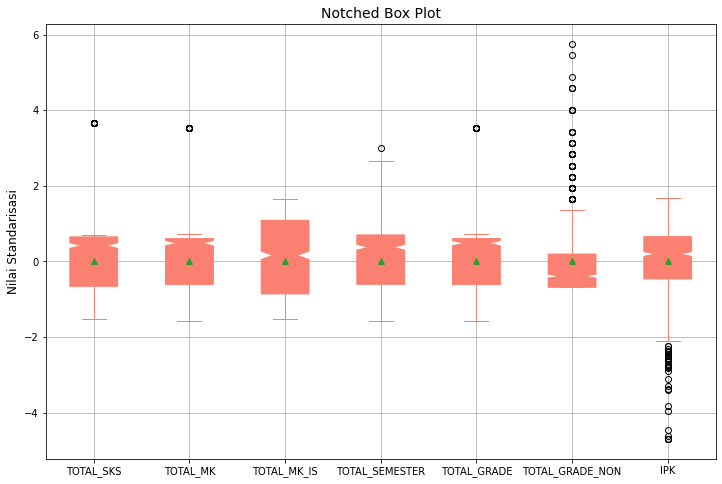


Deskripsi Box Plot:
- Lekukan pada masing-masing Box menandakan median dari masing-masing kolom.
- Tanda Panah hijau pada masing-masing Box menandakan mean dari masing-masing kolom.

Dengan mengambil threshold = 3, terlihat ada beberapa nilai
dari masing-masing kolom yang lebih dari 3.

Selanjutnya, nilai-nilai standarisasi dari masing-masing kolom yang melebihi 3 dianggap
sebagai Outliers sehingga perlu dieliminasi terlebih dahulu.


In [ ]:
print('Analisis Outliers pada DataFrame df')
print('===============================================\n')
print('''Di bawah ini adalah visualisasi Box Plot dari kolom numerical
yang telah melalui proses standarisasi.\n''')

# Memeriksa Outliers dengan Box Plot dan standarisasi Z-Score
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax = df[num_col].boxplot(column=num_col, notch=True, vert=True, patch_artist=True, showbox=True,
                         showmeans=True, color='salmon')
ax.set_title('Notched Box Plot', fontsize=14)
ax.yaxis.grid(True)
ax.set_ylabel('Nilai Standarisasi', fontsize=12)

plt.show()
print('''\nDeskripsi Box Plot:
- Lekukan pada masing-masing Box menandakan median dari masing-masing kolom.
- Tanda Panah hijau pada masing-masing Box menandakan mean dari masing-masing kolom.''')
print('===============================================\n')
print('''Dengan mengambil threshold = 3, terlihat ada beberapa nilai
dari masing-masing kolom yang lebih dari 3.''')
print('''\nSelanjutnya, nilai-nilai standarisasi dari masing-masing kolom yang melebihi 3 dianggap
sebagai Outliers sehingga perlu dieliminasi terlebih dahulu.''')

In [ ]:
# Mengeliminasi Outliers
outlier_entries = (np.abs(df[num_col]) > 3).any(axis=1)
filtered_entries = (np.abs(df[num_col]) <= 3).all(axis=1)

print('Berikut ini adalah hasil analisis Outliers yang diperoleh.\n')
print('Jumlah baris semula                      : {}'.format(len(df)))
print('Jumlah baris yang berisi Outliers        : {}'.format(len(df[outlier_entries])))
print('Jumlah baris yang tidak berisi Outliers  : {}'.format(len(df[filtered_entries])))
print('\nRincian jumlah Outliers per kolom adalah sebagai berikut.')
for i in num_col:
  print('''- Kolom %s ada {} Outliers'''.format((df[i]>3).sum()) %i)

Berikut ini adalah hasil analisis Outliers yang diperoleh.

Jumlah baris semula                      : 770
Jumlah baris yang berisi Outliers        : 40
Jumlah baris yang tidak berisi Outliers  : 730

Rincian jumlah Outliers per kolom adalah sebagai berikut.
- Kolom TOTAL_SKS ada 16 Outliers
- Kolom TOTAL_MK ada 16 Outliers
- Kolom TOTAL_MK_IS ada 0 Outliers
- Kolom TOTAL_SEMESTER ada 0 Outliers
- Kolom TOTAL_GRADE ada 16 Outliers
- Kolom TOTAL_GRADE_NON ada 21 Outliers
- Kolom IPK ada 0 Outliers


In [ ]:
print('Berikut ini adalah deskripsi ringkasan DataFrame df setelah mengeliminasi Outliers.')
df = df[filtered_entries]
df = df.reset_index(drop=True)
print('===============================================================')
df.info()
print('===============================================================\n')
df.describe(include='all')

Berikut ini adalah deskripsi ringkasan DataFrame df setelah mengeliminasi Outliers.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NIM              730 non-null    int64  
 1   TAHUN            730 non-null    int64  
 2   TOTAL_MK         730 non-null    float64
 3   TOTAL_MK_IS      730 non-null    float64
 4   MK_IS            730 non-null    object 
 5   TOTAL_SKS        730 non-null    float64
 6   KET_SKS          730 non-null    int64  
 7   TOTAL_SEMESTER   730 non-null    float64
 8   KET_SEMESTER     730 non-null    int64  
 9   TOTAL_GRADE      730 non-null    float64
 10  TOTAL_GRADE_NON  730 non-null    float64
 11  KET_GRADE        730 non-null    int64  
 12  IPK              730 non-null    float64
 13  KETERANGAN       730 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 80.0+ KB



,NIM,TAHUN,TOTAL_MK,TOTAL_MK_IS,MK_IS,TOTAL_SKS,KET_SKS,TOTAL_SEMESTER,KET_SEMESTER,TOTAL_GRADE,TOTAL_GRADE_NON,KET_GRADE,IPK,KETERANGAN
count,7.300000e+02,730.000000,730.000000,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,NaN,NaN,NaN,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.416860e+09,2014.746575,-0.050735,0.036658,NaN,-0.052866,0.467123,0.001472,0.720548,-0.050735,-0.116162,0.353425,0.096918,0.423288
std,6.212246e+09,2.562288,0.862426,0.993884,NaN,0.850624,0.499260,1.002946,0.449038,0.862426,0.746166,0.478361,0.815684,0.784105
min,8.429000e+03,2010.000000,-1.588386,-1.511596,NaN,-1.531852,0.000000,-1.588148,0.000000,-1.588386,-0.684745,0.000000,-2.770116,0.000000
25%,1.966975e+04,2013.000000,-0.614324,-0.861668,NaN,-0.659836,0.000000,-0.607233,0.000000,-0.614324,-0.684745,0.000000,-0.391047,0.000000
50%,3.174950e+04,2015.000000,0.542376,0.159649,NaN,0.440565,0.000000,0.373682,1.000000,0.542376,-0.391826,0.000000,0.227933,0.000000
75%,1.211031e+10,2017.000000,0.603255,1.088118,NaN,0.648188,1.000000,0.700654,1.000000,0.603255,-0.098908,1.000000,0.662871,0.000000


In [ ]:
df2_P1 = df2.groupby(['TAHUN','KODE_MK'])['P1'].mean()
df2_P1 = pd.DataFrame(df2_P1).reset_index()
#df2_P1 = df2_P1.drop(columns = ['TAHUN'])
df2_P1 = df2_P1.pivot_table(values=['KODE_MK'], index='KODE_MK', columns=['TAHUN'])
df2_P1 = df2_P1.reset_index().fillna(0)
df2_P1.columns = df2_P1.columns.droplevel()
df2_P1 = df2_P1.rename(columns={'':'KODE_MK'})
df2_P1 = df2_P1.rename_axis(None, axis=1)

# 2015
df2_P1_15 = df2_P1.groupby('KODE_MK')[2015].sum()
df2_P1_15 = pd.DataFrame(df2_P1_15).to_dict()

# 2016
df2_P1_16 = df2_P1.groupby('KODE_MK')[2016].sum()
df2_P1_16 = pd.DataFrame(df2_P1_16).to_dict()

# 2017
df2_P1_17 = df2_P1.groupby('KODE_MK')[2017].sum()
df2_P1_17 = pd.DataFrame(df2_P1_17).to_dict()

# 2018
df2_P1_18 = df2_P1.groupby('KODE_MK')[2018].sum()
df2_P1_18 = pd.DataFrame(df2_P1_18).to_dict()

def merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res

df2_P1 = merge(df2_P1_15, df2_P1_16)
df2_P1 = merge(df2_P1, df2_P1_17)
df2_P1 = merge(df2_P1, df2_P1_18)
df2_P1

{2015: {'IS100': 3.28,
  'IS110': 3.19,
  'IS155': 0.0,
  'IS201': 3.115,
  'IS220': 3.26,
  'IS228': 0.0,
  'IS230': 3.205,
  'IS240': 2.99,
  'IS250': 3.3,
  'IS251': 3.56,
  'IS255': 0.0,
  'IS302': 3.22,
  'IS321': 3.35,
  'IS341': 2.98,
  'IS355': 0.0,
  'IS388': 0.0,
  'IS403': 3.245,
  'IS422': 3.1799999999999997,
  'IS431': 2.98,
  'IS432': 3.32,
  'IS442': 3.05,
  'IS512': 3.14,
  'IS513': 3.46,
  'IS534': 0.0,
  'IS535': 0.0,
  'IS543': 3.39,
  'IS544': 3.29,
  'IS545': 0.0,
  'IS555': 0.0,
  'IS556': 0.0,
  'IS557': 0.0,
  'IS571': 3.11,
  'IS580': 3.39,
  'IS623': 3.46,
  'IS624': 0.0,
  'IS645': 3.7,
  'IS647': 0.0,
  'IS652': 3.49,
  'IS655': 0.0,
  'IS660': 3.25,
  'IS670': 3.32,
  'IS672': 3.29,
  'IS681': 3.38,
  'IS725': 3.61,
  'IS726': 0.0,
  'IS727': 3.21,
  'IS747': 3.71,
  'IS748': 3.5,
  'IS749': 0.0,
  'IS773': 0.0,
  'IS782': 3.32},
 2016: {'IS100': 3.54,
  'IS110': 3.14,
  'IS155': 0.0,
  'IS201': 3.465,
  'IS220': 3.0,
  'IS228': 0.0,
  'IS230': 3.33,
  'IS2

In [ ]:
for i in df2_P1:
  print(i)

2015
2016
2017
2018


In [ ]:
df_test = df[['TAHUN', 'MK_IS']]

df_test['test'] = df_test.apply(lambda row: df2_P1, axis=1)
df_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TAHUN,MK_IS,test
0,2010,-,"{2015: {'IS100': 3.28, 'IS110': 3.19, 'IS155':..."
1,2010,-,"{2015: {'IS100': 3.28, 'IS110': 3.19, 'IS155':..."
2,2010,-,"{2015: {'IS100': 3.28, 'IS110': 3.19, 'IS155':..."
3,2010,-,"{2015: {'IS100': 3.28, 'IS110': 3.19, 'IS155':..."
4,2010,-,"{2015: {'IS100': 3.28, 'IS110': 3.19, 'IS155':..."
...,...,...,...
725,2018,"[IS100, IS155, IS201, IS220, IS240, IS251, IS255]","{2015: {'IS100': 3.28, 'IS110': 3.19, 'IS155':..."
726,2018,"[IS255, IS251, IS220, IS201, IS155, IS240, IS100]","{2015: {'IS100': 3.28, 'IS110': 3.19, 'IS155':..."
727,2018,"[IS100, IS155, IS240, IS201, IS255, IS251, IS220]","{2015: {'IS100': 3.28, 'IS110': 3.19, 'IS155':..."
728,2018,"[IS155, IS100, IS255, IS240, IS201, IS251, IS220]","{2015: {'IS100': 3.28, 'IS110': 3.19, 'IS155':..."


### **Exploratory Data Analysis**


Di bawah ini adalah grafik Heatmap yang menunjukkan bobot nilai korelasi
antara masing-masing kolom dalam DataFrame df, baik kolom Categorical maupun
kolom Numerical.



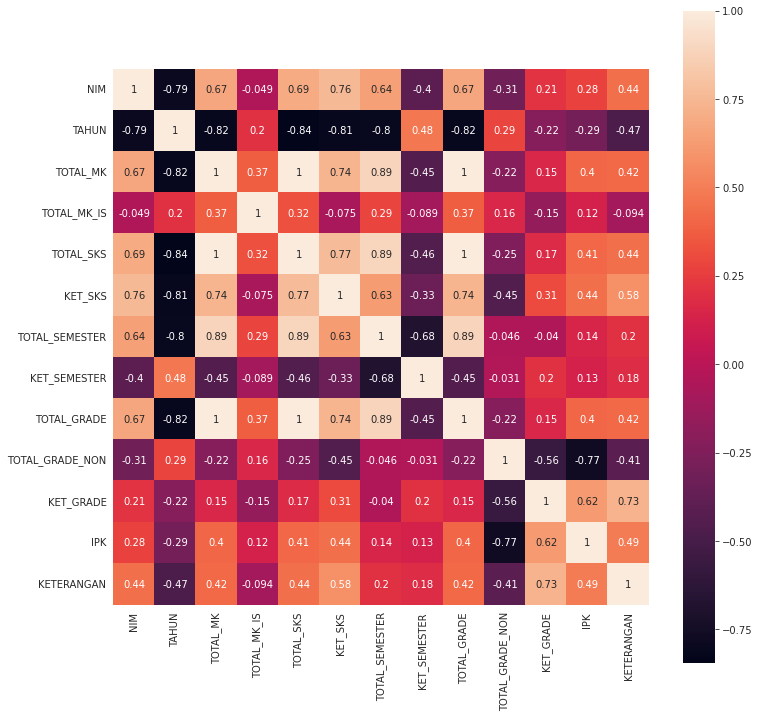


Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. Variabel NIM akan memiliki korelasi yang kuat dengan variabel Total SKS namun memiliki korelasi paling lemah dengan variabel Tahun. 
  2. Variabel Tahun memiliki hubungan paling kuat dengan variabel Keterangan SKS namun memiliki korelasi yang lemah dengan Total SKS. 
  3. Variabel Total MK memiliki hubungan paling kuat dengan variabel Total Grade dan Total SKS. Namun memiliki korelasi yang lemah dengan Tahun.
  4. Variabel Total MK IS memiliki hubungan paling kuat dengan variabel Tahun. Namun memiliki korelasi yang lemah dengan NIM.
  5. Variabel Total SKS memiliki hubungan paling kuat dengan variabel Total Grade dan Total SKS. Namun memiliki korelasi yang lemah dengan Tahun
  6. Variabel Keterangan SKS memiliki hubungan paling kuat dengan variabel Tahun. Namun memiliki korelasi yang lemah dengan NIM.
  7. Variabel Total Semester memiliki hubungan paling kuat dengan variabel Total Grade dan Total MK. Namun memiliki korelasi

In [ ]:
print('''
Di bawah ini adalah grafik Heatmap yang menunjukkan bobot nilai korelasi
antara masing-masing kolom dalam DataFrame df, baik kolom Categorical maupun
kolom Numerical.\n''')

# Heatmap
fig = plt.figure(figsize=(12,12))
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)

plt.show()
print('''
Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. Variabel NIM akan memiliki korelasi yang kuat dengan variabel Total SKS namun memiliki korelasi paling lemah dengan variabel Tahun.
  2. Variabel Tahun memiliki hubungan paling kuat dengan variabel Keterangan SKS namun memiliki korelasi yang lemah dengan Total SKS.
  3. Variabel Total MK memiliki hubungan paling kuat dengan variabel Total Grade dan Total SKS. Namun memiliki korelasi yang lemah dengan Tahun.
  4. Variabel Total MK IS memiliki hubungan paling kuat dengan variabel Tahun. Namun memiliki korelasi yang lemah dengan NIM.
  5. Variabel Total SKS memiliki hubungan paling kuat dengan variabel Total Grade dan Total SKS. Namun memiliki korelasi yang lemah dengan Tahun
  6. Variabel Keterangan SKS memiliki hubungan paling kuat dengan variabel Tahun. Namun memiliki korelasi yang lemah dengan NIM.
  7. Variabel Total Semester memiliki hubungan paling kuat dengan variabel Total Grade dan Total MK. Namun memiliki korelasi yang lemah dengan Tahun.
  8. Variabel Keterangan Semester memiliki hubungan paling kuat dengan variabel Total MK dan Total SKS. Namun memiliki korelasi yang lemah dengan Tahun.
  9. Variabel Total Grade memiliki hubungan paling kuat dengan variabel Total Grade dan Total SKS. Namun memiliki korelasi yang lemah dengan Tahun.
  10. Variabel Total Grade Non memiliki hubungan paling kuat dengan variabel Keterangan Grade. Namun memiliki korelasi yang lemah dengan IPK.
  11. Variabel Keterangan Grade memiliki hubungan paling kuat dengan variabel Total Grade Non. Namun memiliki korelasi yang lemah dengan IPK.
  12. Variabel IPK memiliki hubungan paling kuat dengan variabel Total Grade dan Total MK. Namun memiliki korelasi yang lemah dengan Total Grade Non.
  13. Variabel Keterangan memiliki hubungan paling kuat dengan variabel Keterangan Grade dan Total SKS. Namun memiliki korelasi yang lemah dengan IPK dan NIM
 ''')


Di bawah ini adalah Violin Plot dan Box Plot dari 7 kolom Numerical yang terdiri atas:
  1. Kolom jumlah SKS
  2. Kolom jumlah mata kuliah
  3. Kolom jumlah mata kuliah IS
  4. Kolom jumlah semester
  5. Kolom jumlah nilai huruf
  6. Kolom jumlah nilai huruf D, E, dan F
  7. Kolom IPK

Kolom-kolom di atas disusun berdasarkan indeks yang mewakili masing-masing NIM.
Visualisasi di bawah merupakan hasil pengolahan data yang telah melalui proses data cleaning
dan eliminasi outliers. Tujuan visualisasi Violin Plot adalah untuk melihat distribusi 
persebaran data masing-masing kolom, sedangkan tujuan visualisasi Box Plot adalah sebagai
pembanding untuk Violin Plot.



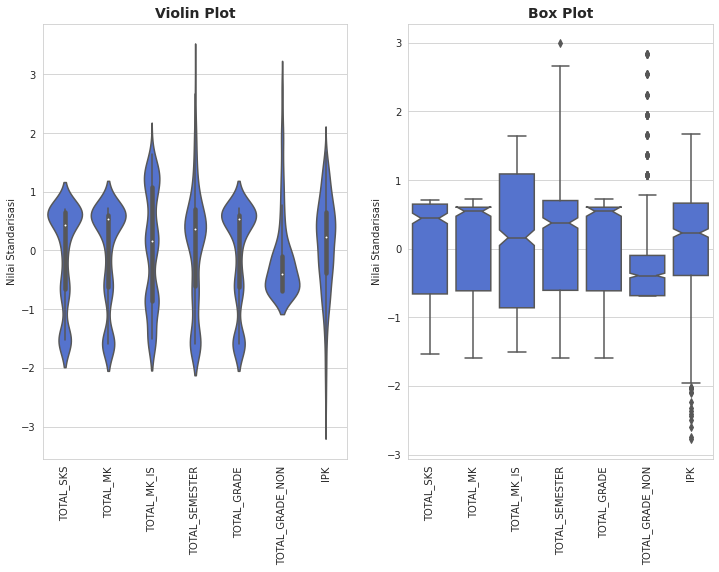


Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. Terdapat nilai pencilan pada setiap variabel, yaitu variabel Total Semester, Total Grade Non, dan IPK
  2. Tidak ada variabel yang berdistribusi normal
  3. Kurva Total SKS, Total MK, Total MK IS, Total Semester, dan Total Grade membentuk distribusi multimodal
  4. Variabel IPK dan Total Grade Non terindikasi adanya skew


In [ ]:
print('''
Di bawah ini adalah Violin Plot dan Box Plot dari 7 kolom Numerical yang terdiri atas:
  1. Kolom jumlah SKS
  2. Kolom jumlah mata kuliah
  3. Kolom jumlah mata kuliah IS
  4. Kolom jumlah semester
  5. Kolom jumlah nilai huruf
  6. Kolom jumlah nilai huruf D, E, dan F
  7. Kolom IPK\n
Kolom-kolom di atas disusun berdasarkan indeks yang mewakili masing-masing NIM.
Visualisasi di bawah merupakan hasil pengolahan data yang telah melalui proses data cleaning
dan eliminasi outliers. Tujuan visualisasi Violin Plot adalah untuk melihat distribusi
persebaran data masing-masing kolom, sedangkan tujuan visualisasi Box Plot adalah sebagai
pembanding untuk Violin Plot.\n''')

fig = plt.figure(figsize=(12,8))
ax0 = plt.subplot2grid((1,2), (0,0))
ax1 = plt.subplot2grid((1,2), (0,1))

sns.set_style('whitegrid')

# Violin Plot
grafik_0 = sns.violinplot(ax=ax0, data=df[num_col], color='royalblue', grid=10)
grafik_0.set_ylabel('Nilai Standarisasi')
grafik_0.set_xticklabels(labels=num_col, rotation=90)
grafik_0.set_title('Violin Plot', fontdict={'fontweight':'bold', 'fontsize':14})

# Box Plot
grafik_1 = sns.boxplot(ax=ax1, data=df[num_col], color='royalblue', notch=True)
grafik_1.set_ylabel('Nilai Standarisasi')
grafik_1.set_xticklabels(labels=num_col, rotation=90)
grafik_1.set_title('Box Plot', fontdict={'fontweight':'bold', 'fontsize':14})

plt.show()

print('''
Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. Terdapat nilai pencilan pada setiap variabel, yaitu variabel Total Semester, Total Grade Non, dan IPK
  2. Tidak ada variabel yang berdistribusi normal
  3. Kurva Total SKS, Total MK, Total MK IS, Total Semester, dan Total Grade membentuk distribusi multimodal
  4. Variabel IPK dan Total Grade Non terindikasi adanya skew''')


Di bawah ini adalah grafik distribusi dari 7 kolom Numerical yang terdiri atas:
  1. Kolom jumlah SKS
  2. Kolom jumlah mata kuliah
  3. Kolom jumlah mata kuliah IS
  4. Kolom jumlah semester
  5. Kolom jumlah nilai huruf
  6. Kolom jumlah nilai huruf D, E, dan F
  7. Kolom IPK

Kolom-kolom di atas disusun berdasarkan indeks yang mewakili masing-masing NIM.
Visualisasi grafik distribusi di bawah bertujuan untuk melihat distribusi data yang lebih
rinci dan jelas dari Violin Plot.




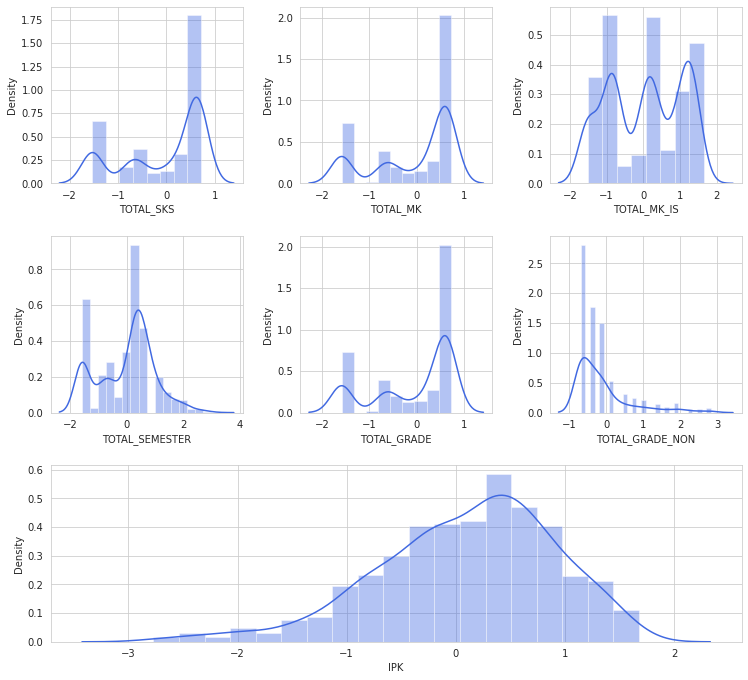


Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. Dari ketujuh variabel tersebut tidak ada variabel yang memiliki distribusi normal
  2. Kurva Total SKS, Total MK, Total MK IS, Total Semester, dan Total Grade secara grafik terlihat membentuk distribusi multimodal
  3. Variabel IPK memiliki skew ke kiri karena ekor (tail) landai ke sumbu negatif karena IPK mahasiswa cenderung tinggi 
      sehingga membentuk distribusi serong ke kiri
  4. Variabel Total Grade Non memiliki skew ke kanan karena ekor (tail) landai ke sumbu positif karena Total Grade Non mahasiswa 
      cenderung rendah sehingga membentuk distribusi serong ke kanan
  5. Ketujuh variabel tidak mempunyai sebaran nilai yang merata


In [ ]:
print('''
Di bawah ini adalah grafik distribusi dari 7 kolom Numerical yang terdiri atas:
  1. Kolom jumlah SKS
  2. Kolom jumlah mata kuliah
  3. Kolom jumlah mata kuliah IS
  4. Kolom jumlah semester
  5. Kolom jumlah nilai huruf
  6. Kolom jumlah nilai huruf D, E, dan F
  7. Kolom IPK\n
Kolom-kolom di atas disusun berdasarkan indeks yang mewakili masing-masing NIM.
Visualisasi grafik distribusi di bawah bertujuan untuk melihat distribusi data yang lebih
rinci dan jelas dari Violin Plot.\n''')
print('=============================================================')

# Histogram
fig = plt.figure(figsize=(12,15))
ax1 = plt.subplot2grid((4,3), (0,0))
ax2 = plt.subplot2grid((4,3), (0,1))
ax3 = plt.subplot2grid((4,3), (0,2))
ax4 = plt.subplot2grid((4,3), (1,0))
ax5 = plt.subplot2grid((4,3), (1,1))
ax6 = plt.subplot2grid((4,3), (1,2))
ax7 = plt.subplot2grid((4,3), (2,0), colspan=3)

grafik_1 = sns.distplot(df['TOTAL_SKS'], ax=ax1, color='royalblue')
grafik_2 = sns.distplot(df['TOTAL_MK'], ax=ax2, color='royalblue')
grafik_3 = sns.distplot(df['TOTAL_MK_IS'], ax=ax3, color='royalblue')
grafik_4 = sns.distplot(df['TOTAL_SEMESTER'], ax=ax4,color='royalblue')
grafik_5 = sns.distplot(df['TOTAL_GRADE'], ax=ax5, color='royalblue')
grafik_6 = sns.distplot(df['TOTAL_GRADE_NON'], ax=ax6, color='royalblue')
grafik_7 = sns.distplot(df['IPK'], ax=ax7,color='royalblue')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
print('=============================================================\n')
plt.show()

print('''
Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. Dari ketujuh variabel tersebut tidak ada variabel yang memiliki distribusi normal
  2. Kurva Total SKS, Total MK, Total MK IS, Total Semester, dan Total Grade secara grafik terlihat membentuk distribusi multimodal
  3. Variabel IPK memiliki skew ke kiri karena ekor (tail) landai ke sumbu negatif karena IPK mahasiswa cenderung tinggi
      sehingga membentuk distribusi serong ke kiri
  4. Variabel Total Grade Non memiliki skew ke kanan karena ekor (tail) landai ke sumbu positif karena Total Grade Non mahasiswa
      cenderung rendah sehingga membentuk distribusi serong ke kanan
  5. Ketujuh variabel tidak mempunyai sebaran nilai yang merata''')


Di bawah ini adalah grafik batang dan grafik garis yang menjelaskan tentang tren kelulusan dari
tahun 2010 s/d 2018 berdasarkan 4 syarat yang telah ditentukan, yaitu :
  1. Jumlah SKS >= 144 SKS
  2. Jumlah Semester <= 8 Semester
  3. Tidak terdapat nilai D, E, dan F
  4. IPK >= 2.50



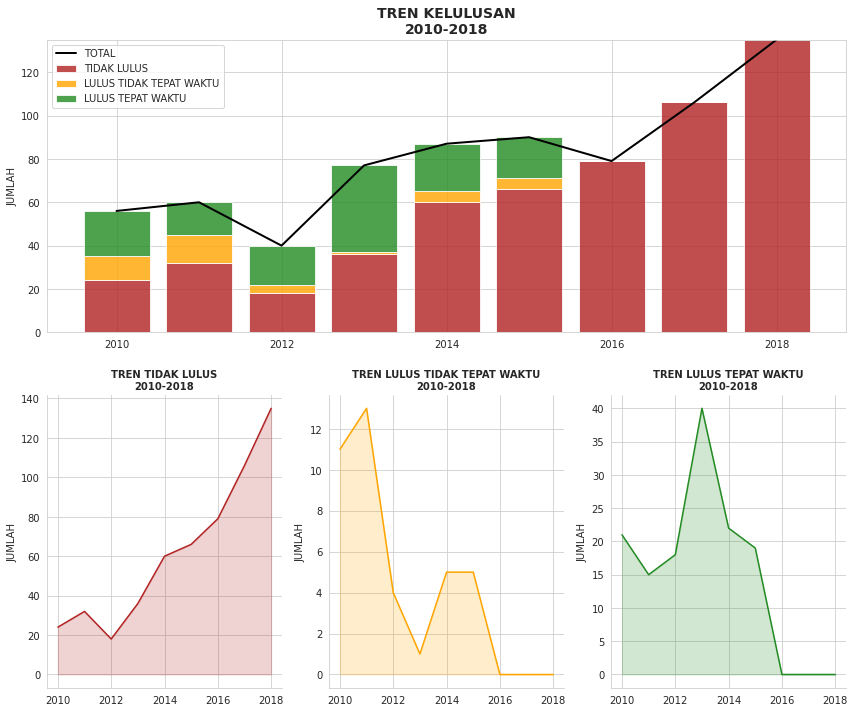


Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. Dari setiap angkatannya mahasiswa yang tidak lulus semakin meningkat
  2. Tren lulus tepat waktu dapat dilihat pula semakin tinggi angkatannya maka trennya semakin menurun
  3. Angkatan yang paling banyak lulus tepat waktu merupakan angkatan 2013
  4. Tren lulus tidak tepat waktu menunjukkan bahwa semakin tinggi angkatannya maka jumlah mahasiswa yang lulus tidak tepat waktu pun semakin menurun
  5. Angkatan terbanyak yang lulus tidak tepat waktu adalah angkatan 2010 - 2011



In [ ]:
print('''
Di bawah ini adalah grafik batang dan grafik garis yang menjelaskan tentang tren kelulusan dari
tahun 2010 s/d 2018 berdasarkan 4 syarat yang telah ditentukan, yaitu :
  1. Jumlah SKS >= 144 SKS
  2. Jumlah Semester <= 8 Semester
  3. Tidak terdapat nilai D, E, dan F
  4. IPK >= 2.50\n''')

# Membuat DataFrame Jumlah Kelulusan
df_tren = df.groupby(['TAHUN', 'KETERANGAN'])['NIM'].count().reset_index(name='JUMLAH')
df_tren = df_tren.pivot_table('JUMLAH', ['TAHUN'], 'KETERANGAN').reset_index()
df_tren = df_tren.set_index('TAHUN')
df_tren = df_tren.rename_axis(None, axis=1).fillna(0)
df_tren = df_tren.rename(columns={0:'Tidak Lulus', 1:'Lulus Tidak Tepat Waktu',
                                  2:'Lulus Tepat Waktu'})
df_tren = df_tren.astype(int)
df_tren['TOTAL'] = df_tren['Lulus Tepat Waktu']+df_tren['Lulus Tidak Tepat Waktu']+df_tren['Tidak Lulus']

# Membuat Grafik Tren Kelulusan
grafik_1 = df_tren['Tidak Lulus']
grafik_2 = df_tren['Lulus Tidak Tepat Waktu']
grafik_3 = df_tren['Lulus Tepat Waktu']

fig = plt.figure(figsize=(12,10))
ax0= plt.subplot2grid((2,3), (0,0), colspan=3)
ax1 = plt.subplot2grid((2,3), (1,0))
ax2 = plt.subplot2grid((2,3), (1,1))
ax3 = plt.subplot2grid((2,3), (1,2))

#Grafik_Utama
ax0.bar(x=df_tren.index, height='Tidak Lulus', data=df_tren, color='firebrick', alpha=0.8)
ax0.bar(x=df_tren.index, height='Lulus Tidak Tepat Waktu', data=df_tren, bottom=grafik_1, color='orange', alpha=0.8)
ax0.bar(x=df_tren.index, height='Lulus Tepat Waktu', data=df_tren, bottom=grafik_1+grafik_2, color='forestgreen', alpha=0.8)
df_tren['TOTAL'].plot(ax=ax0, color='black', linewidth=2)
ax0.set_title('TREN KELULUSAN\n2010-2018', fontweight='bold', fontsize=14)
ax0.set_ylabel('JUMLAH')
ax0.set(xlabel=None)
ax0.legend(['TOTAL','TIDAK LULUS', 'LULUS TIDAK TEPAT WAKTU', 'LULUS TEPAT WAKTU'])

#Grafik_1
grafik_1.plot(ax=ax1, kind='line', rot=0, color='firebrick')
ax1.fill_between(grafik_1.index, grafik_1, color='firebrick', alpha=0.2)
ax1.set_title('TREN TIDAK LULUS\n2010-2018', fontweight='bold', fontsize=10)
ax1.set_ylabel('JUMLAH')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set(xlabel=None)

#Grafik_2
grafik_2.plot(ax=ax2, kind='line', rot=0, color='orange')
ax2.fill_between(grafik_2.index, grafik_2, color='orange', alpha=0.2)
ax2.set_title('TREN LULUS TIDAK TEPAT WAKTU\n2010-2018', fontweight='bold', fontsize=10)
ax2.set_ylabel('JUMLAH')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set(xlabel=None)

#Grafik_3
grafik_3.plot(ax=ax3, kind='line', rot=0, color='forestgreen')
ax3.fill_between(grafik_3.index, grafik_3, color='forestgreen', alpha=0.2)
ax3.set_title('TREN LULUS TEPAT WAKTU\n2010-2018', fontweight='bold', fontsize=10)
ax3.set_ylabel('JUMLAH')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set(xlabel=None)


plt.tight_layout(h_pad=2, w_pad=1)
plt.show()

print('''
Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. Dari setiap angkatannya mahasiswa yang tidak lulus semakin meningkat
  2. Tren lulus tepat waktu dapat dilihat pula semakin tinggi angkatannya maka trennya semakin menurun
  3. Angkatan yang paling banyak lulus tepat waktu merupakan angkatan 2013
  4. Tren lulus tidak tepat waktu menunjukkan bahwa semakin tinggi angkatannya maka jumlah mahasiswa yang lulus tidak tepat waktu pun semakin menurun
  5. Angkatan terbanyak yang lulus tidak tepat waktu adalah angkatan 2010 - 2011
''')


Di bawah ini adalah visualiasi EDA dari Dataset 1 (df1) tentang Transkrip Mahasiswa.
Visualisasi ini terdiri atas 4 jenis grafik yang berbeda-beda dengan rincian sebagai berikut.
  Grafik 1 : Grafik batang tentang 10 mata kuliah yang paling banyak diambil oleh mahasiswa.
  Grafik 2 : Grafik lingkaran tentang komposisi jumlah nilai huruf yang diberikan kepada mahasiswa
             selama tahun 2010-2018.
  Grafik 3 : Grafik batang horizontal tentang 10 nilai angka yang paling sering diberikan oleh
             diberikan oleh dosen kepada mahasiswa selama tahun 2010-2018.
  Grafik 4 : Grafik lingkaran tentang komposisi jumlah mahasiswa berdasarkan angkatan tahun 2010-2018



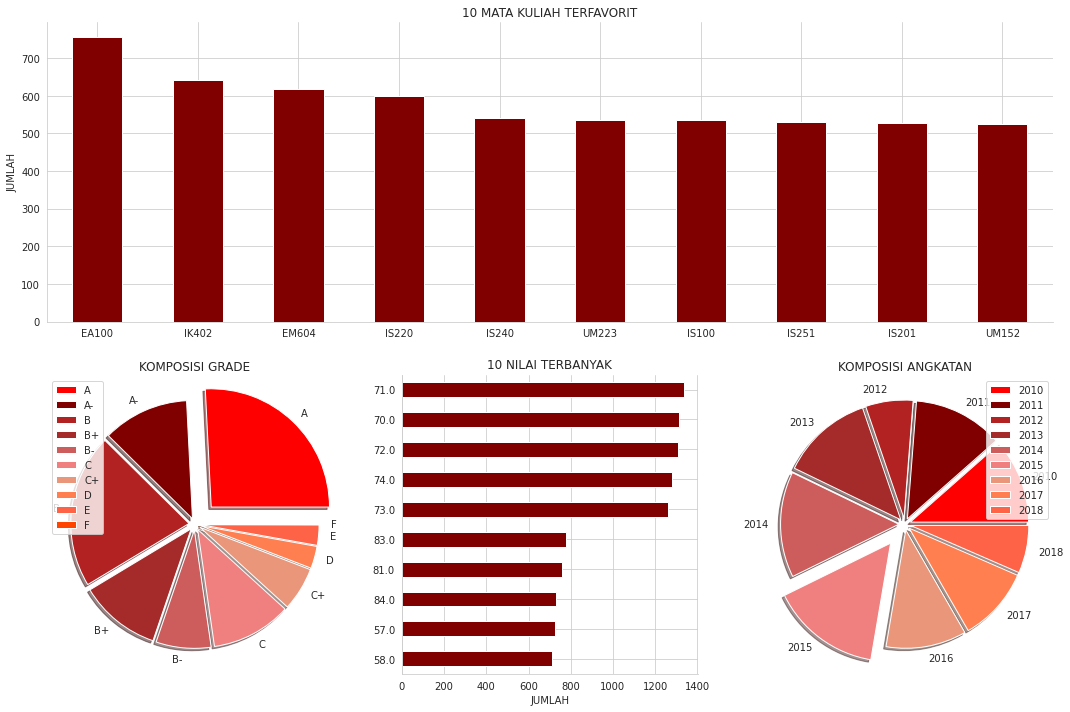


Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. 10 mata kuliah yang banyak diambil adalah EA100 (Pengantar Akuntansi 1), K402 (Komunikasi Interpersonal), EM604 (Technopreneurship), IS220 (Interaksi Manusia dan Komputer), 
  IS240 (Probabilitas dan Statistik), UM223 (Bahasa Inggris 2), IS100 (Sistem Informasi Dalam Manajemen), IS251 (Perilaku Organisasi), IS201 (Proses Bisnis Korporat), UM152 (Agama)
  2. Grade A merupakan grade yang paling banyak didapatkan oleh para mahasiswa dengan proporsi sebanyak 25% dari grade lainnya disusul dengan grade B, A-, dan grade-grade lainnya
  3. Grade yang paling sedikit didapatkan adalah grade F dan E
  4. 10 nilai yang paling banyak didapatkan oleh para mahasiswa adalah 71, 70, 72, 74, 73, 83, 81, 84, 57, dan 58
  5. komposisi angkatan terbanyak berasal dari angkatan 2015, disusul dengan angkatan 2014, dan angkatan-angkatan lainnya
  6. Sedangkan untuk komposisi angkatan yang paling sedikit berasal dari angkatan 2012



In [ ]:
print('''
Di bawah ini adalah visualiasi EDA dari Dataset 1 (df1) tentang Transkrip Mahasiswa.
Visualisasi ini terdiri atas 4 jenis grafik yang berbeda-beda dengan rincian sebagai berikut.
  Grafik 1 : Grafik batang tentang 10 mata kuliah yang paling banyak diambil oleh mahasiswa.
  Grafik 2 : Grafik lingkaran tentang komposisi jumlah nilai huruf yang diberikan kepada mahasiswa
             selama tahun 2010-2018.
  Grafik 3 : Grafik batang horizontal tentang 10 nilai angka yang paling sering diberikan oleh
             diberikan oleh dosen kepada mahasiswa selama tahun 2010-2018.
  Grafik 4 : Grafik lingkaran tentang komposisi jumlah mahasiswa berdasarkan angkatan tahun 2010-2018\n''')

Top_10_MK = df1['KODE_MK'].value_counts(sort=True).head(10)
Top_10_NILAI = pd.DataFrame(df1['NILAI'].value_counts(sort=True).head(10)).reset_index()
komposisi_GRADE = df1['GRADE'].value_counts(sort=True, normalize=True).reset_index()
komposisi_ANGKATAN = df1['ANGKATAN'].value_counts(sort=True, normalize=True).reset_index()

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((2,3), (1,0))
ax3 = plt.subplot2grid((2,3), (1,1))
ax4 = plt.subplot2grid((2,3), (1,2))

#Grafik_1
Top_10_MK.plot(ax=ax1, kind='bar', rot=0, color='maroon')
ax1.set_title('10 MATA KULIAH TERFAVORIT')
ax1.set_ylabel('JUMLAH')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#Grafik_2
komposisi_GRADE = komposisi_GRADE.sort_values('index', ascending=True)
komposisi_GRADE = komposisi_GRADE.set_index('index')

colors = ['red', 'maroon', 'firebrick', 'brown', 'indianred', 'lightcoral',
          'darksalmon', 'coral', 'tomato', 'orangered']
komposisi_GRADE.plot(ax=ax2, y='GRADE', kind='pie', shadow=True, legend=True, colors=colors,
                     explode = [0.20, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
ax2.set_title('KOMPOSISI GRADE')
ax2.set_ylabel(None)
ax2.set_xlabel(None)

#Grafik_3
Top_10_NILAI = Top_10_NILAI.sort_values('NILAI', ascending=True)
Top_10_NILAI = Top_10_NILAI.set_index('index')

Top_10_NILAI.plot(ax=ax3, kind='barh', rot=0, color='maroon', legend=None)
ax3.set_title('10 NILAI TERBANYAK')
ax3.set_xlabel('JUMLAH')
ax3.set_ylabel(None)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

#Grafik_4
komposisi_ANGKATAN = komposisi_ANGKATAN.sort_values('index', ascending=True)
komposisi_ANGKATAN = komposisi_ANGKATAN.set_index('index')

colors = ['red', 'maroon', 'firebrick', 'brown', 'indianred', 'lightcoral',
          'darksalmon', 'coral', 'tomato']
komposisi_ANGKATAN.plot(ax=ax4, y='ANGKATAN', kind='pie', shadow=True, legend=True, colors=colors,
                     explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.20, 0.05, 0.05, 0.05])
ax4.set_title('KOMPOSISI ANGKATAN')
ax4.set_ylabel(None)
ax4.set_xlabel(None)

plt.tight_layout(h_pad=2, w_pad=3)
plt.show()
print('''
Dari grafik di atas, diperoleh analisis sebagai berikut.
  1. 10 mata kuliah yang banyak diambil adalah EA100 (Pengantar Akuntansi 1), K402 (Komunikasi Interpersonal), EM604 (Technopreneurship), IS220 (Interaksi Manusia dan Komputer),
  IS240 (Probabilitas dan Statistik), UM223 (Bahasa Inggris 2), IS100 (Sistem Informasi Dalam Manajemen), IS251 (Perilaku Organisasi), IS201 (Proses Bisnis Korporat), UM152 (Agama)
  2. Grade A merupakan grade yang paling banyak didapatkan oleh para mahasiswa dengan proporsi sebanyak 25% dari grade lainnya disusul dengan grade B, A-, dan grade-grade lainnya
  3. Grade yang paling sedikit didapatkan adalah grade F dan E
  4. 10 nilai yang paling banyak didapatkan oleh para mahasiswa adalah 71, 70, 72, 74, 73, 83, 81, 84, 57, dan 58
  5. komposisi angkatan terbanyak berasal dari angkatan 2015, disusul dengan angkatan 2014, dan angkatan-angkatan lainnya
  6. Sedangkan untuk komposisi angkatan yang paling sedikit berasal dari angkatan 2012
''')

## **Modelling & Evaluation**

### **Algoritma Klasifikasi**

In [ ]:
#split dataset
x = df[['TOTAL_SKS', 'TOTAL_SEMESTER', 'IPK', 'TOTAL_GRADE_NON']]
y = df["KETERANGAN"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 88)

**Logistic regression**

In [ ]:
#logistic regression

warnings.filterwarnings('ignore')

logreg = LogisticRegression(random_state = 88)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=88)

In [ ]:
y_predict = logreg.predict(x_test)
y_predict

array([2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0])

In [ ]:
y_predict_train = logreg.predict(x_train)
y_predict_train

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,

In [ ]:
y_predict1 = logreg.predict_proba(x_test)
y_predict1

array([[1.68104976e-01, 8.85153329e-02, 7.43379691e-01],
       [7.74922799e-01, 3.59012531e-02, 1.89175948e-01],
       [9.99997903e-01, 8.79247879e-07, 1.21747689e-06],
       [1.34372224e-01, 6.84682127e-02, 7.97159563e-01],
       [9.99999820e-01, 1.59590005e-07, 2.07977733e-08],
       [9.17747240e-01, 4.09087293e-02, 4.13440310e-02],
       [9.46217881e-01, 5.36780598e-02, 1.04059130e-04],
       [9.99927168e-01, 5.45405789e-05, 1.82917034e-05],
       [2.64681003e-01, 2.13749096e-01, 5.21569901e-01],
       [9.86349776e-01, 6.30323297e-03, 7.34699080e-03],
       [9.74657039e-01, 2.48413859e-02, 5.01575333e-04],
       [1.00000000e+00, 2.12308927e-13, 2.90003721e-14],
       [9.99999855e-01, 7.60791370e-08, 6.92831197e-08],
       [9.99998381e-01, 1.46270864e-06, 1.56219709e-07],
       [9.99772005e-01, 2.14172248e-04, 1.38225686e-05],
       [9.99999999e-01, 4.99490556e-10, 1.18184610e-10],
       [3.49297937e-01, 5.35295767e-02, 5.97172486e-01],
       [3.20160153e-01, 2.48719

In [ ]:
#metode evaluasi

print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predict))

print('\naccuracy')
print(accuracy_score(y_test, y_predict))

print('\nclassification report')
print(classification_report(y_test, y_predict))


confustion matrix
[[109   0   3]
 [  2   1  11]
 [  0   0  20]]

accuracy
0.8904109589041096

classification report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       112
           1       1.00      0.07      0.13        14
           2       0.59      1.00      0.74        20

    accuracy                           0.89       146
   macro avg       0.86      0.68      0.62       146
weighted avg       0.93      0.89      0.86       146



In [ ]:
#metode evaluasi

print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_train, y_predict_train))

print('\naccuracy')
print(accuracy_score(y_train, y_predict_train))

print('\nclassification report')
print(classification_report(y_train, y_predict_train))


confustion matrix
[[439   0   5]
 [  3   8  14]
 [  0   0 115]]

accuracy
0.9623287671232876

classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       444
           1       1.00      0.32      0.48        25
           2       0.86      1.00      0.92       115

    accuracy                           0.96       584
   macro avg       0.95      0.77      0.80       584
weighted avg       0.97      0.96      0.96       584



Data terindikasi overfitting karena nilai akurasi data train jauh lebih besar dibanding data test

**K-Nearest Neighbor**

In [ ]:
#K-NEARREST NEIGHBOR

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predictKNN = knn.predict(x_test)

In [ ]:
y_predictKNN

array([2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0,
       1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0])

In [ ]:
y_predictKNN_train = knn.predict(x_train)

In [ ]:
#metode evaluation

print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predictKNN))


print('\naccuracy')
print(accuracy_score(y_test, y_predictKNN))


print('\nclassification report')
print(classification_report(y_test, y_predictKNN))


confustion matrix
[[110   0   2]
 [  1  13   0]
 [  0   0  20]]

accuracy
0.9794520547945206

classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       112
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        20

    accuracy                           0.98       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.98      0.98      0.98       146



In [ ]:
#metode evaluation

print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_train, y_predictKNN_train))


print('\naccuracy')
print(accuracy_score(y_train, y_predictKNN_train))


print('\nclassification report')
print(classification_report(y_train, y_predictKNN_train))


confustion matrix
[[442   2   0]
 [  4  20   1]
 [  0   0 115]]

accuracy
0.988013698630137

classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       444
           1       0.91      0.80      0.85        25
           2       0.99      1.00      1.00       115

    accuracy                           0.99       584
   macro avg       0.96      0.93      0.95       584
weighted avg       0.99      0.99      0.99       584



Data tidak terindikasi overfitting karena nilai evaluasi data train dan data test tidak terlalu jauh

**XGBoost**

In [ ]:
#XGBoost
RANDOM_STATE = 42
LR = 0.01
TEST_SIZE = 0.33
MAX_DEPTH = 0
NTHREAD = 2
EVAL_METRIC = 'mlogloss'
BOOSTER = 'gbtree'
VERBOSITY = 1

In [ ]:
model = xgb.XGBClassifier(
                        random_state=RANDOM_STATE,
                        learning_rate=LR,
                        booster=BOOSTER,
                        nthread=NTHREAD,
                        eval_metric=EVAL_METRIC,
                        verbosity=VERBOSITY
                        )

In [ ]:
model.fit(x_train, y_train)
predict_test = model.predict(x_test)

In [ ]:
predict_train = model.predict(x_train)

In [ ]:
#metode evaluation
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, predict_test))

print('\naccuracy')
print(accuracy_score(y_test, predict_test))

print('\nclassification report')
print(classification_report(y_test, predict_test))


confustion matrix
[[111   0   1]
 [  0  14   0]
 [  0   0  20]]

accuracy
0.9931506849315068

classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       1.00      1.00      1.00        14
           2       0.95      1.00      0.98        20

    accuracy                           0.99       146
   macro avg       0.98      1.00      0.99       146
weighted avg       0.99      0.99      0.99       146



In [ ]:
#metode evaluation
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_train, predict_train))

print('\naccuracy')
print(accuracy_score(y_train, predict_train))

print('\nclassification report')
print(classification_report(y_train, predict_train))


confustion matrix
[[444   0   0]
 [  0  25   0]
 [  0   0 115]]

accuracy
1.0

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00       115

    accuracy                           1.00       584
   macro avg       1.00      1.00      1.00       584
weighted avg       1.00      1.00      1.00       584



Data tidak terindikasi overfitting karena perbedaan nilai data train dan data test tidak terlalu jauh.

Akurasi paling bagus K-NEARREST NEIGHBOR dan XGBoost.

